<a id='start'></a>
# Serie storiche

In questo notebook vengono presentati degli esercizi sulle serie storiche (_time series_).

Provate a svolgere il seguente esercizio:<br>
1) [Analisi di una time series](#section1)<br>
2) [Scomposizione nelle componenti principali](#section2)<br>
3) [Eliminazione di trend e stagionalità](#section3)<br>
4) [Predizione sulla serie originale](#section4)<br>

<a id='section1'></a>
## Analisi di una time series

Analizziamo i dati dei passeggeri dei voli di linea negli Stati Uniti:

In [9]:
import pandas as pd

df = pd.read_csv('data/AirPassengers.csv', parse_dates=['date'], index_col='date')
df

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Effettuiamo la visualizzazione dei dati con un grafico a linee (sia normale che con two sided view):

In [10]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)

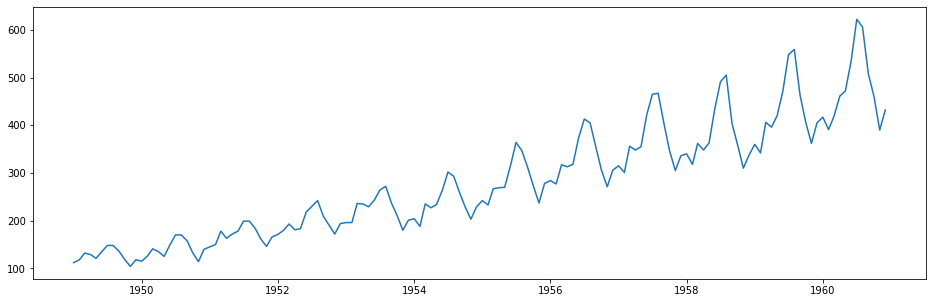

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(df.index, df.value)

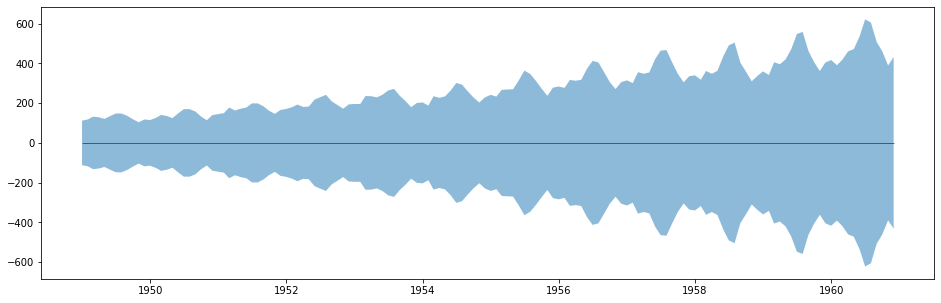

In [21]:
import numpy as np
plt.figure(figsize=(16,5))

plt.fill_between(df.index, y1=df.value, y2=-df.value, alpha=0.5, linewidth=2)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=0.5)

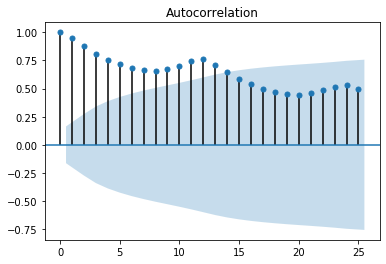

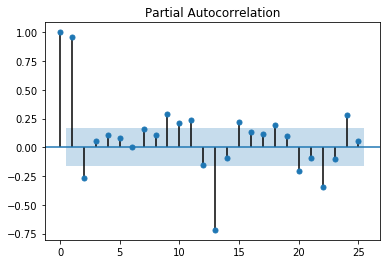

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df.value.tolist(), lags=25)
plt.show()

plot_pacf(df.value.tolist(), lags=25)
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.values)

print ("ADF Statistics: %s" % result[0])
print ("p-value: %s" % result[1])

ADF Statistics: 0.8153688792060543
p-value: 0.9918802434376411


<a id='section2'></a>
## Scomposizione nelle componenti principali

Eseguiamo le tecniche viste per realizzare una scomposizione nelle componenti principali dei dati di questa serie storica:

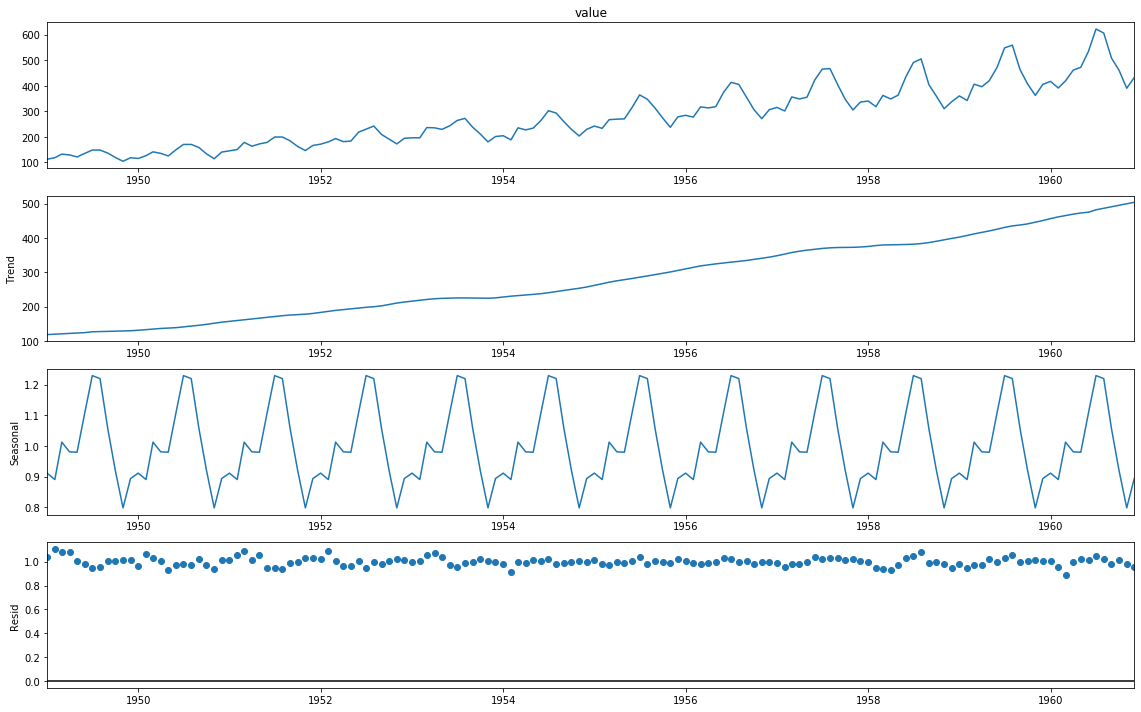

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

result.plot()
plt.show()

In [49]:
result = adfuller(result.resid.values)

print ("ADF Statistics: %s" % result[0])
print ("p-value: %s" % result[1])

ADF Statistics: -7.590190972177403
p-value: 2.5434864627625748e-11


<a id='section3'></a>
## Eliminazione di trend e stagionalità

Eliminiamo il trend:

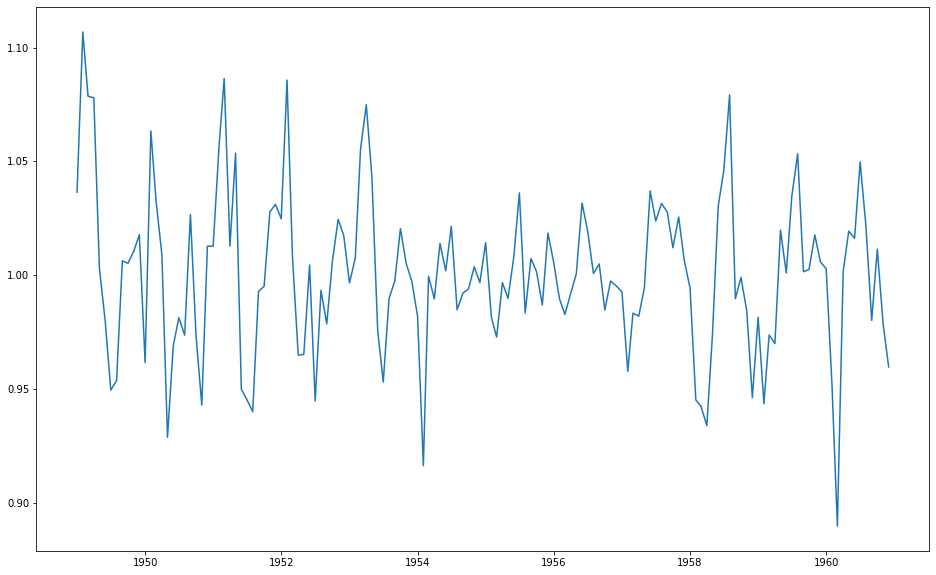

In [57]:
detrended = df.value.values / result.seasonal / result.trend

plt.plot(df.index, detrended)
plt.show()

Eliminiamo la stagionalità:

Eliminiamo sia trand che stagionalità:

<a id='section4'></a>
## Predizione della serie originale

Proviamo a provedere i prossimi 3 anni (36 mesi) dei dati di questa serie:

In [58]:
import pmdarima as pm

model = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True,
                      d=None, D=1, trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

model.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1024.824, BIC=1039.200, Time=2.438 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.057 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.533 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.421 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.020 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1022.343, BIC=1030.968, Time=0.124 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1021.137, BIC=1035.513, Time=2.004 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=1017.164, BIC=1034.415, Time=7.536 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=102

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.922
Date:                            Thu, 07 May 2020   AIC                           1015.844
Time:                                    10:25:57   BIC                           1033.095
Sample:                                         0   HQIC                          1022.854
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.033      0.013      0.990      -0.065       0.066
ma.L1         -0.4235      0.068     -6.194      0.000      -0.558      -0.290
ar.S.L12       0.6663      0.158      4.229      0.000       0.358       0.975
ar.S.L24       0.3318      0.096      3.469      0.001       0.144       0.519
ma.S.L12      -0.9712      1.091     -0.890      0.373      -3.109       1.167
sigma2       110.8287     98.274      1.128      0.259     -81.785     303.443
===================================================================================
Ljung-Box (Q):                       53.12   Jarque-Bera (JB):                 7.55
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.82   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

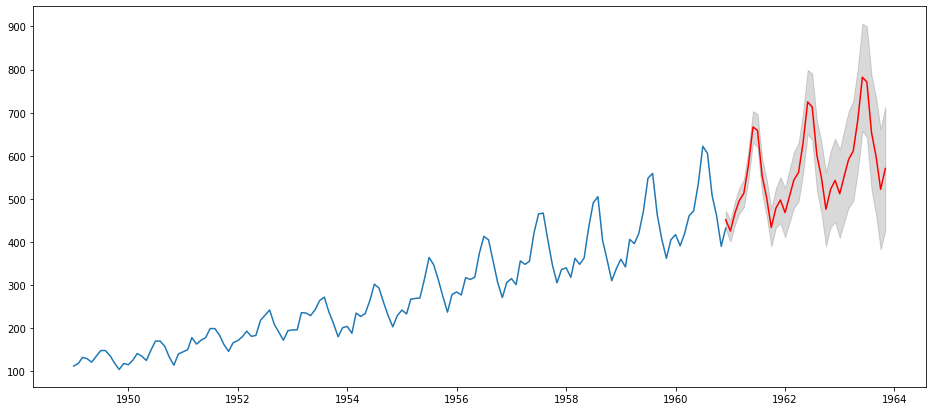

In [65]:
n_periods = 36
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

index_of_fc = pd.date_range(df.index[-1], periods=n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16, 7))

plt.plot(df)
plt.plot(fitted_series, color='red')

plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.show()

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>